# Text Mining and Search

UniMiB 2022/23

**IMDB Reviews**

In [1]:
# imports

import io
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

Merge data - Train

In [ ]:
train_dataset = pd.DataFrame(columns=['text','sentiment'])

found = 0
for file in tqdm(os.listdir('../data/raw/train/neg/')):
  with io.open('../data/raw/train/neg/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    train_dataset.loc[len(train_dataset)] = [text, 'NEG']
for file in tqdm(os.listdir('../data/raw/train/pos/')):
  with io.open('../data/raw/train/pos/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    train_dataset.loc[len(train_dataset)] = [text, 'POS']
            

In [ ]:
train_dataset.to_csv('../data/train_dataset.csv')

Merge data - Test

In [ ]:
test_dataset = pd.DataFrame(columns=['text', 'sentiment'])

found = 0
for file in tqdm(os.listdir('../data/raw/test/neg/')):
  with io.open('../data/raw/test/neg/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    test_dataset.loc[len(test_dataset)] = [text, 'NEG']
for file in tqdm(os.listdir('../data/raw/test/pos/')):
  with io.open('../data/raw/test/pos/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    test_dataset.loc[len(test_dataset)] = [text, 'POS']


In [ ]:
test_dataset.to_csv('../data/test_dataset.csv')

Read data

In [2]:
train = pd.read_csv('../data/train_dataset.csv')
train = train[['text', 'sentiment']]
train.head()

,text,sentiment
0,Story of a man who has unnatural feelings for ...,NEG
1,Airport '77 starts as a brand new luxury 747 p...,NEG
2,This film lacked something I couldn't put my f...,NEG
3,"Sorry everyone,,, I know this is supposed to b...",NEG
4,When I was little my parents took me along to ...,NEG


In [3]:
test = pd.read_csv('../data/test_dataset.csv')
test = test[['text', 'sentiment']]
test.head()

,text,sentiment
0,Once again Mr. Costner has dragged out a movie...,NEG
1,This is an example of why the majority of acti...,NEG
2,"First of all I hate those moronic rappers, who...",NEG
3,Not even the Beatles could write songs everyon...,NEG
4,Brass pictures (movies is not a fitting word f...,NEG


### Text Pre-Processing

In [4]:
import string
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from preprocess import *

In [ ]:
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('tests'))

In [ ]:
lemmatizer = WordNetLemmatizer()
def remove_numbers(text_to_preprocess):
    return re.sub(r'\d+', '', text_to_preprocess)


def remove_punctuation(text):
    return text[0].translate(str.maketrans('', '', string.punctuation))


def remove_stopwords(text):
    no_stopwords = ''
    for item in text.split():
      if item not in stopwords.words():
        no_stopwords+=' '+item
    return no_stopwords


def postagger(token_words):
    return nltk.pos_tag(token_words)


def remove_extra_whitespace(text):
    return " ".join(text.split())

def tokenizer(text):
  return word_tokenize(text)

def lemmatizer_function(tokenized_text):
  lemmatized_text= ''
  for token in tokenized_text:
    lemmatized = lemmatizer.lemmatize(token)
    lemmatized_text += ' '+lemmatized
  return lemmatized_text

def preprocess_text(text):
    text = text.str.lower()
    no_nums = remove_numbers(text),
    no_punct = remove_punctuation(no_nums)
    no_stopw = remove_stopwords(no_punct)
    no_whtspace = remove_extra_whitespace(no_stopw)
    tokenized = tokenizer(no_whtspace)
    lemmatized = lemmatizer_function(tokenized)
    return lemmatized

In [ ]:
import numpy as np
from multiprocessing import Pool
from preprocess import preprocess_loader
if __name__ == '__main__':
  df_split = np.array_split(train_ds, 10)
  pool = Pool(10)
  df = pd.concat(pool.map(preprocess_loader, df_split))
  pool.close()
  pool.join()

In [ ]:
tqdm.pandas()

train['preprocessed_text'] = train['text'].progress_apply(preprocess_text)
train.head()

### Data Exploration

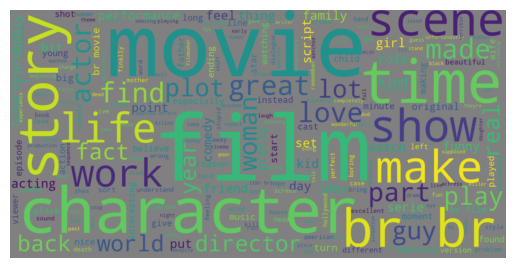

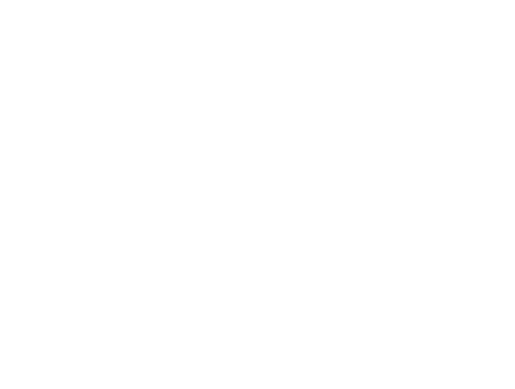

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Get the text and join all the reviews in training set
#Creating the text variable
text = " ".join(cat for cat in train_pp.preprocessed_text)

# limit the word count and set the stopwords
wordcount = 500
stopwords = set(STOPWORDS)
stopwords.add("english")

# setup, generate and save the word cloud image to a file
wc = WordCloud(scale=5, 
               background_color="grey", 
               max_words=wordcount, 
               stopwords=stopwords)
wc.generate(text)
wc.to_file("WordCloud.png")

# show the wordcloud as output
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

In [16]:
# print  number of unique words
print("Number of words: ")
print(len(np.unique(np.hstack(train_pp.preprocessed_text))))
print ()

# print the average review length
print("Average review length:")
result = [len(x) for x in train_pp.preprocessed_text]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Number of words: 
24902

Average review length:
Mean 685.01 words (545.460708)


### Text Representation

In [5]:
train_pp = pd.read_csv('../data/preprocessed_train.csv')
train_pp = train_pp[['text', 'sentiment', 'preprocessed_text']]
train_pp.head()

,text,sentiment,preprocessed_text
0,Story of a man who has unnatural feelings for ...,NEG,story unnatural feeling pig start opening sce...
1,Airport '77 starts as a brand new luxury 747 p...,NEG,airport start brand luxury plane loaded valua...
2,This film lacked something I couldn't put my f...,NEG,film lacked put finger charisma part leading ...
3,"Sorry everyone,,, I know this is supposed to b...",NEG,sorry supposed art film wow handed gun screen...
4,When I was little my parents took me along to ...,NEG,parent theater interior movie watched parent ...


Bag-of-Word (BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer      #-- Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer      #-- Tf-Idf

In [ ]:
text_preprocessed = train_pp['preprocessed_text']

vectorizer = CountVectorizer(ngram_range=(1,2),                                 #-- Uni-grams and Bi-grams
                             max_features = 25000)                              #-- Most 25000 frequent grams across the text
X_text_bow =  vectorizer.fit_transform(text_preprocessed)

In [ ]:
'''
text_preprocessed = df_train['preprocessed_text']

vectorizer = CountVectorizer(max_features = 25000)
X_text_bow =  vectorizer.fit_transform(text_preprocessed)
'''

In [ ]:
print(type(X_text_bow.shape))

In [ ]:
import joblib 
joblib.dump(X_text_bow, 'processed_train_bow.save')

Binary

In [ ]:
text_preprocessed = train_pp['preprocessed_text']

vectorizer = CountVectorizer(binary = True, max_features = 25000)
X_text_binary =  vectorizer.fit_transform(text_preprocessed)

In [ ]:
print(X_text_bow.shape)

In [ ]:
import joblib
joblib.dump(X_text_bow, 'processed_train_binary_bow.save')

TF-IDF

In [ ]:
text_preprocessed = train_pp['preprocessed_text']

vectorizer = TfidfVectorizer(max_features=25000, ngram_range=(1, 2),)
X_text_tfidf =  vectorizer.fit_transform(text_preprocessed).toarray()

In [ ]:
print(X_text_tfidf.shape)

In [ ]:
import joblib
joblib.dump(X_text_tfidf, 'processed_train_tfidf.save')

### Text Classification

Support Vector Machines (SVM)

XGBoost

Rectified Linear Unit (ReLU)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import joblib
from sklearn.preprocessing import LabelEncoder
import scipy

In [ ]:
labels = train_pp['sentiment']

In [ ]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)

In [ ]:
X_train = joblib.load('processed_train_tfidf.save')

In [ ]:
inputs = tf.keras.Input(shape=(25000))

x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
prediction = layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, prediction)
model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(X_train,encoded_labels,epochs=10)

### Text Clustering